<a href="https://colab.research.google.com/github/apiasak/datascience-portfolio/blob/main/code/Customer360_Retail_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# สร้าง Customer360 Dashboard ง่ายๆ ด้วย Python (Part 1)

วันนี้เราจะมาลองสร้าง Customer 360 Dashboard ด้วย Library ecommercetools ของ Matt Clarke จาก https://practicaldatascience.co.uk/ ซึ่งเป็น Python Library ที่ช่วยให้เราเขียน Code ในการสร้าง customer 360 dashboard ได้อย่างง่ายๆ เลยครับ วันนี้เราจะมาลองทำกันเลย

In [176]:
# ติดตั้ง Library โดยผมใช้ command --quiet เพื่อที่จะติดตั้งแบบไม่โชว์ command หรือ silent install นะครับ
!pip install ecommercetools squarify --upgrade --quiet

## Step 1: Load Basic Library

In [177]:
import pandas as pd
import numpy as np

import squarify

from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16, 9]

pd.options.display.float_format = '{:,.2f}'.format

### Load ecommercetools library

In [178]:
from ecommercetools import customers
from ecommercetools import utilities
from ecommercetools import transactions

## Step 2: Load Sample Data 
โดยในตัวอย่างนี้เราจะใช้ข้อมูล Retail Dataset จาก UCI นะครับ ซึ่งเมื่อ load มาแล้วเราต้องทำการ เปลี่ยนชื่อ column ให้พร้อมก่อนที่จะใช้ใน ecommercetools lib นะครับ

In [179]:
df = pd.read_csv('https://raw.githubusercontent.com/databricks/Spark-The-Definitive-Guide/master/data/retail-data/all/online-retail-dataset.csv',  
                 parse_dates=['InvoiceDate'])

df.rename(columns={
        'InvoiceDate': 'order_date',
        'InvoiceNo': 'order_id',
        'CustomerID': 'customer_id',
        'StockCode': 'sku',
        'Quantity': 'quantity',
        'UnitPrice': 'unit_price'
    }, inplace=True)

# calculate ยอดสั่งซื้อ
df['line_price'] = df['quantity'] * df['unit_price']

# show data
df.head()

,order_id,sku,Description,quantity,order_date,unit_price,customer_id,Country,line_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,"17,850.00",United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,"17,850.00",United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34


### คำอธิบายข้อมูล
* **order_id**: เลขที่ใบสั่งซื้อสินค้า ถ้าขึ้นต้นด้วย c คือเป็นรายการที่ยกลิก
* **sku**: รหัสสินค้า
* **Description**: ชื่อสินค้า
* **quantity**: จำนวนสินค้าที่สั่งซื้อในรายการนั้น
* **order_date**: วันที่สั่งซื้อสินค้า
* **unit_price**: ราคาสินค้าที่สั่งซื้อ
* **customer_id**: รหัสลูกค้า
* **Country**: ประเทศที่ทำการสั่งซื้อ
* **line_price**: ยอดสั่งซื้อสินค้ารายการนั้น

In [181]:
transactions_df = transactions.get_transactions(df)

print('ข้อมูลการสั่งซื้อตั้งแต่วันที่ {} ถึงวันที่ {} '.format(transactions_df['order_date'].min(), transactions_df['order_date'].max()))
print('มีรายการทั้งหมด {} คำสั่งซื้อ '.format(transactions_df.shape[0]))

ข้อมูลการสั่งซื้อตั้งแต่วันที่ 2010-12-01 08:26:00 ถึงวันที่ 2011-12-09 12:50:00 
มีรายการทั้งหมด 25900 คำสั่งซื้อ 


## Step 3: สรุปข้อมูลลูกค้า

In [106]:
customers_df = customers.get_customers(df)
customers_df.head()

,customer_id,revenue,orders,skus,items,first_order_date,last_order_date,avg_items,avg_order_value,tenure,recency,cohort
0,"12,346.00",0.00,2,1,0,2011-01-18 10:01:00,2011-01-18 10:17:00,0.00,0.00,4287,4287,20111
1,"12,347.00","4,310.00",7,103,2458,2010-12-07 14:57:00,2011-12-07 15:52:00,351.14,615.71,4329,3964,20104
2,"12,348.00","1,797.24",4,22,2341,2010-12-16 19:09:00,2011-09-25 13:13:00,585.25,449.31,4320,4037,20104
3,"12,349.00","1,757.55",1,73,631,2011-11-21 09:51:00,2011-11-21 09:51:00,631.00,"1,757.55",3980,3980,20114
4,"12,350.00",334.40,1,17,197,2011-02-02 16:01:00,2011-02-02 16:01:00,197.00,334.40,4272,4272,20111


จะเห็นว่าเพียงแค่เขียนโค้ดไม่กี่บรรทัด เราก็ได้ข้อมูลสรุปลูกค้าออกมาแล้วนะครับ สะดวกมากๆ เลยใช่มั้ยครับ โดยข้อมูลที่ได้สามารถอธิบายได้ดังนี้

* **customer_id**: รหัสลูกค้า
* **revenue**: ยอดสั่งซื้อรวม
* **orders**: จำนวนคำสั่งซื้อทั้งหมด
* **sku**: จำนวนสินค้าที่ซื้อ
* **items**: จำนวนชิ้นที่ซื้อ (qty)
* **first_order_date**: วันที่ซื้อสินค้าครั้งแรก
* **last_order_date**: วันที่ซื้อสินค้าล่าสุด
* **avg_items**: จำนวนชิ้นต่อคำสั่งซื้อ (qty)
* **avg_order_value**: ค่าเฉลี่ยในการสั่งซื้อแต่ละครั้ง
* **tenure**: อายุของลูกค้า
* **recency**: สั่งซื้อล่าสุดผ่านมาแล้วกี่วัน
* **cohort**: เดือนที่เป็นลูกค้าครั้งแรก

** หมายเหตุ เนื่องจากว่าข้อมูลใน Dataset ค่อนข้างเก่า การคำนวณ  tenure, recency ใช้วันที่ปัจจุบันเทียบ เลยทำให้ข้อมูลค่อนข้างนานผิดปกติ



In [182]:
# หา Max date, min date
mindate = df['order_date'].dt.date.min()
maxdate = df['order_date'].dt.date.max() + timedelta(days=1)

# แก้ไข recency เทียบกับข้อมูล maxdate
customers_df['tenure'] = (pd.to_datetime(maxdate) - customers_df['first_order_date']).dt.days
customers_df['recency'] = (pd.to_datetime(maxdate) - customers_df['last_order_date']).dt.days

# ข้อมูลจะดูสมจริงมากขึ้น
customers_df.head()

,customer_id,revenue,orders,skus,items,first_order_date,last_order_date,avg_items,avg_order_value,tenure,recency,cohort
0,"12,346.00",0.00,2,1,0,2011-01-18 10:01:00,2011-01-18 10:17:00,0.00,0.00,325,325,20111
1,"12,347.00","4,310.00",7,103,2458,2010-12-07 14:57:00,2011-12-07 15:52:00,351.14,615.71,367,2,20104
2,"12,348.00","1,797.24",4,22,2341,2010-12-16 19:09:00,2011-09-25 13:13:00,585.25,449.31,358,75,20104
3,"12,349.00","1,757.55",1,73,631,2011-11-21 09:51:00,2011-11-21 09:51:00,631.00,"1,757.55",18,18,20114
4,"12,350.00",334.40,1,17,197,2011-02-02 16:01:00,2011-02-02 16:01:00,197.00,334.40,310,310,20111


## Step 4: สร้าง RFM dataset

RFM เป็นการจัดกลุ่มลูกค้าจากพฤติกรรมการสั่งซื้อของลูกค้า โดยมา มาจากคำว่า 
* Recency ลูกค้าซื้อสินค้าล่าสุดนานหรือยัง
* Frequency ลูกค้าซื้อสินค้าไปกี่ครั้งแล้ว
* Monetary ลูกค้าซื้อสินค้าไปเป็นเงินเท่าไหร่แล้ว

จริงๆ RFM เป็นที่นิยมเพื่อให้เราจะได้นำเสนอสินค้าได้ตรงกับพฤติกรรมของลูกค้าแต่ละคน ลองมาดูครับ

In [110]:
rfm_df = customers.get_rfm_segments(customers_df)
rfm_df.head()

,customer_id,acquisition_date,recency_date,recency,frequency,monetary,heterogeneity,tenure,r,f,m,h,rfm,rfm_score,rfm_segment_name
0,"12,346.00",2011-01-18 10:01:00,2011-01-18 10:17:00,325,2,0.00,1,325,1,1,1,1,111,3,Risky
1,"12,350.00",2011-02-02 16:01:00,2011-02-02 16:01:00,310,1,334.40,17,310,1,1,1,1,111,3,Risky
2,"12,365.00",2011-02-21 13:51:00,2011-02-21 14:04:00,291,3,320.69,22,291,1,1,1,1,111,3,Risky
3,"12,373.00",2011-02-01 13:10:00,2011-02-01 13:10:00,311,1,364.60,14,311,1,1,1,1,111,3,Risky
4,"12,386.00",2010-12-08 09:53:00,2011-01-06 12:37:00,337,2,401.90,10,366,1,1,1,1,111,3,Risky


In [111]:
rfm_df.groupby(by=['rfm_segment_name']).agg(
    customers=('customer_id','nunique'),
    avg_revenue=('monetary','mean'),
    total_revenue=('monetary','sum'),
    avg_frequency=('frequency','mean'),
    avg_recency=('recency','mean')
).reset_index()

,rfm_segment_name,customers,avg_revenue,total_revenue,avg_frequency,avg_recency
0,Hold and improve,443,490.03,"217,082.32",1.70,244.30
1,Loyal,3062,"1,954.01","5,983,181.04",5.67,34.62
2,Potential loyal,530,689.08,"365,211.10",2.53,154.67
3,Risky,311,326.92,"101,672.60",1.55,334.66
4,Star,26,"62,804.57","1,632,918.75",87.04,4.46


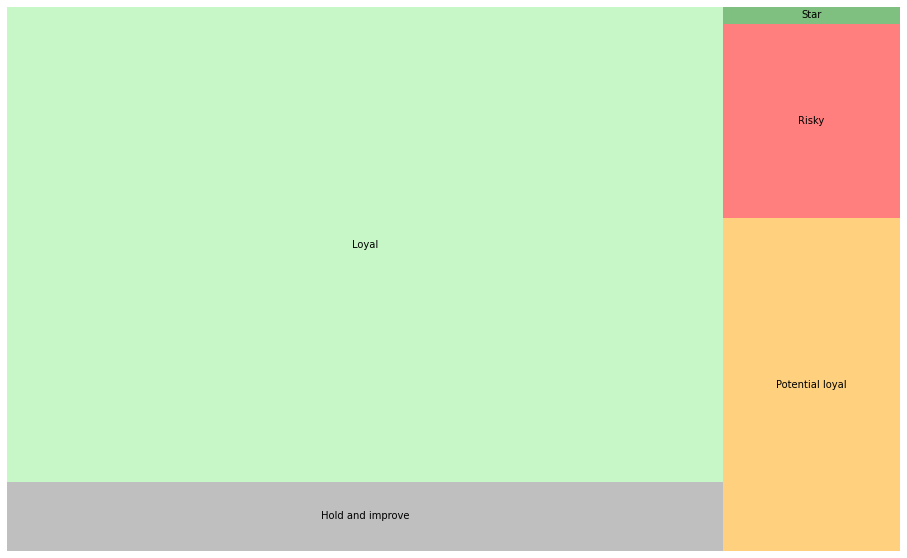

In [183]:
df_treemap = rfm_df.groupby('rfm_segment_name').agg(
    customers=('customer_id', 'count')
).reset_index()

fig, ax = plt.subplots(1, figsize = (16,10))

squarify.plot(sizes=df_treemap['customers'], 
              label=df_treemap['rfm_segment_name'], 
              alpha=.5,
              color=['gray', 'lightgreen', 'orange', 'red', 'green']
             )
plt.axis('off')
plt.show()

Boom! ไม่กี่บรรทัดเราก็ได้ออกมาแล้ว จะเห็นได้ว่า ผลลัพธ์ที่ได้ออกมาค่อนข้างน่าพอใจ เราสามารถสร้าง RFM dataset ออกมาได้ทั้งหมด 5 กลุ่ม ได้แก่ 

* **Star** ลูกค้าแฟนพันธ์แท้ มีการสั่งซื้อสูงมาก และพึ่งทำการสั่งซื้อไปไม่นาน
* **Loyal** ลูกค้าชั้นดี มีการสั่งซื้อเยอะ มีความถี่ในการสั่งซื้อที่ดี
* **Potential loyal** ลูกค้าที่มีการสั่งซื้อปานกลาง มีโอกาสเป็นลูกค้าชั้นดีได้
* **Hold and improve** กลุ่มลูกค้าที่มีการสั่งซื้อที่น้อย และไม่ได้ซื้อมาสักระยะแล้ว
* **Risky** กลุ่มลูกค้าที่มีการสั่งซื้อที่น้อยที่สุด และแทบไม่ได้กลับมาซื้ออีกเลย

ที่มา https://dergipark.org.tr/tr/download/article-file/2343280

## Step 5: Latency 
ต่อไปเป็นการคำนวณเรื่องระยะเวลาเฉลี่ยต่อการสั่งซื้อแต่ละครั้ง เพื่อประเมิณว่าลูกค้าคนไหนที่ถึงเวลาสั่งซื้อแล้วแต่ไม่ได้ทำการสั่งซื้อเข้ามา อันนี้ทีมขายอาจจะทำการติดตามหรือนำเสนอโปรโมชันให้กลับมาซื้่อสินค้าต่อ

In [113]:
latency_df = customers.get_latency(transactions_df)
latency_df.head()

,customer_id,frequency,recency_date,recency,avg_latency,min_latency,max_latency,std_latency,cv,days_to_next_order,label
0,"12,680.00",4,2011-12-09 12:50:00,3963,28,16,73,30.86,1.10,"-3,904.00",Order overdue
1,"13,113.00",24,2011-12-09 12:49:00,3963,15,0,52,12.06,0.80,"-3,936.00",Order overdue
2,"15,804.00",13,2011-12-09 12:31:00,3963,15,1,39,11.01,0.73,"-3,937.00",Order overdue
3,"13,777.00",33,2011-12-09 12:25:00,3963,11,0,48,12.06,1.10,"-3,940.00",Order overdue
4,"17,581.00",25,2011-12-09 12:21:00,3963,14,0,67,21.97,1.57,"-3,927.00",Order overdue


เพียงแค่ไม่กี่บรรทัดเราก็ได้ข้อมูลระยะเวลาเฉลี่ยต่อการสั่งซื้อออกมาแล้ว แต่เนื่้องจากว่าชุดข้อมูลอาจจะเก่า เดี๋ยวเรามาลองปรับข้อมูลดูนะครับ

In [184]:
 # Label latency ใหม่ตามข้อมูล maxdate
def _latency_label_customers(avg_latency, std_latency, recency):
  """Add a label to describe a customer's latency metric.
  Args:
      avg_latency (float): Average latency in days
      std_latency (float): Standard deviation of latency in days
      recency (float): Recency in days
  Returns:
          Label describing the latency metric in relation to the customer.
  """

  days_to_next_order_upper = avg_latency - (recency - std_latency)
  days_to_next_order_lower = avg_latency - (recency + std_latency)

  if recency < days_to_next_order_lower:
      return 'Order not due'

  elif (recency <= days_to_next_order_lower) or (recency <= days_to_next_order_upper):
      return 'Order due soon'

  elif recency > days_to_next_order_upper:
      return 'Order overdue'

  else:
      return 'Not sure'


# เทียบ latency กับ maxdate
latency_df['recency'] = (pd.to_datetime(maxdate) - latency_df['recency_date']).dt.days
latency_df['days_to_next_order'] = latency_df['avg_latency'] - (latency_df['recency'] - latency_df['std_latency'])

latency_df['label'] = latency_df.apply(
    lambda x: _latency_label_customers(x['avg_latency'], x['std_latency'], x['recency']), 
    axis=1
)

# ข้อมูลดูสมจริงมากขึ้น
latency_df.head()

,customer_id,frequency,recency_date,recency,avg_latency,min_latency,max_latency,std_latency,latency_cov,days_to_next_order,latency_label,label
0,"12,680.00",4,2011-12-09 12:50:00,0,28,16,73,30.86,1.10,58.86,Order due soon,Order due soon
1,"13,113.00",24,2011-12-09 12:49:00,0,15,0,52,12.06,0.80,27.06,Order not due,Order not due
2,"15,804.00",13,2011-12-09 12:31:00,0,15,1,39,11.01,0.73,26.01,Order not due,Order not due
3,"13,777.00",33,2011-12-09 12:25:00,0,11,0,48,12.06,1.10,23.06,Order due soon,Order due soon
4,"17,581.00",25,2011-12-09 12:21:00,0,14,0,67,21.97,1.57,35.97,Order due soon,Order due soon


In [118]:
latency_df.groupby(by=['label']).agg(
    customers=('customer_id','nunique')
).reset_index()

,label,customers
0,Not sure,835
1,Order due soon,1074
2,Order not due,203
3,Order overdue,733


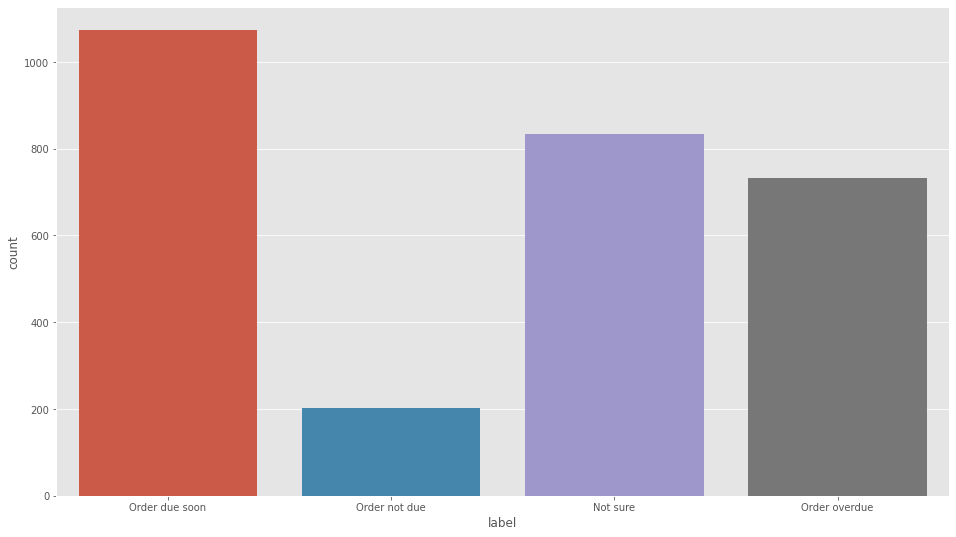

In [185]:
sns.countplot(data=latency_df, x='label')

จากข้อมูลเราก็ได้ข้อมูลลูกค้าแบ่งตามกลุ่มว่า 
* **Not sure** คือกลุ่มลูกค้าที่อาจจะยังจับรูปแบบไม่ได้
* **Order due soon** คือกลุ่มที่ใกล้ถึงวันที่ควรจะต้องสั่งซื้อแล้ว
* **Order not due** คือกลุ่มที่ยังไม่ถึงรอบในการสั่งซื้อ
* **Order overdue** คือกลุ่มที่เลยรอบสั่งซื้อแล้วแต่ไม่ได้ทำการสั่งซื้อ

เพียงเท่านี้เราก็ได้ข้อมูลมาใช้ในการสั่งซื้อแล้ว

## Step 6: ABC Customer segment (Pareto principle)

มาครับ รอบนี้เรามาสร้าง Customer segment ตามหลักการ Pareto Principle 80/20 ครับ
เรามาทำความเข้าใจ Pareto principle กันก่อนนะครับ

ตามหลักการของ Pareto จะมีเพึยง Customer 20% (โดยประมาณ) เท่านั้นที่สร้างยอดขาย 80% ของยอดขายทั้งหมด น่าแปลกใจใช่มั้ยล่ะครับ เรามาลองดูกันดีกว่า

* **Class A** คือลูกค้าที่มียอดขายรวมกันได้ 80%, 
* **Class B** คือลูกค้าที่มียอดขายรวมแล้วอยู่ในช่วง 80% ถึง 90% 
* **Class C** ลูกค้าที่เหลือ

In [186]:
abc_df = customers.get_abc_segments(customers_df, 
                                    months=12, 
                                    abc_class_name='abc_class_12m', 
                                    abc_rank_name='abc_rank_12m')
abc_df.head()

,customer_id,abc_class_12m,abc_rank_12m
1703,"14,646.00",A,1.00
4233,"18,102.00",A,2.00
3758,"17,450.00",A,3.00
1895,"14,911.00",A,4.00
55,"12,415.00",A,5.00


In [187]:
# marge data to test
abc_summary = customers_df.merge(abc_df, on='customer_id')

# summary abc customer segment
df_summary = abc_summary.groupby('abc_class_12m').agg(
    customers=('customer_id', 'nunique'),
    orders=('orders', 'sum'),
    skus=('skus', 'sum'),
    quantity=('items', 'sum'),
    revenue=('revenue', 'sum')
).reset_index()

df_summary['avg_order_value'] = df_summary['revenue'] / df_summary['orders']
df_summary['avg_orders'] = df_summary['orders'] / df_summary['customers']
df_summary['avg_quantity'] = df_summary['quantity'] / df_summary['orders']
df_summary['avg_revenue'] = df_summary['revenue'] / df_summary['customers']
df_summary['pc_revenue'] = round((df_summary['revenue'] / df_summary['revenue'].sum()) * 100, 2)
df_summary['pc_customers'] = round((df_summary['customers'] / df_summary['customers'].sum()) * 100, 2)

# show result
df_summary

,abc_class_12m,customers,orders,skus,quantity,revenue,avg_order_value,avg_orders,avg_quantity,avg_revenue,pc_revenue,pc_customers
0,A,1160,14208,153949,3846562,"6,623,535.61",466.18,12.25,270.73,"5,709.94",79.80,26.53
1,B,753,3238,47443,503371,"828,195.51",255.77,4.30,155.46,"1,099.86",9.98,17.22
2,C,2369,4644,64475,543258,"828,648.17",178.43,1.96,116.98,349.79,9.98,54.19
3,D,90,100,1748,13697,"19,686.52",196.87,1.11,136.97,218.74,0.24,2.06


จากข้อมูลจะเห็นได้ชัดเลยใช่มั้ยครับว่ามีเพียง 1160 คน จากลูกค้า 4372 หรือเพียง 26.53% (pc_customers) ที่สร้างรายได้ เป็น 79.8% (pc_revenue) ของยอด revenue ทั้งหมด 6,623,535.61 พระเจ้าช่วยเลยใช่มั้ยครับ คราวนี้เราจะได้ focus ได้ถูกว่าเราควรที่จะ focus ลูกค้าคนไหนก่อนดี

## Step 6: Predict Customer AOV, CLV, Orders

มาถึงส่วนที่ผมว่ามันเจ๋งมากๆ เลยคือการ Prediction ครับ ตัว Lib ตัวนี้สามารถช่วยให้เรา predict ว่าลูกค้้าจะมีพฤติกรรมที่เปลี่ยนไปอย่างไรในอนาคต เช่น ภายใน 3 เดือนข้างหน้า ใครจะสั่งซื้อสินค้ามากที่สุด เป็นจำนวนเงินเท่าไหร่ สุดยอดไปเลยใช่มั้ยครับ มาลองดูกันเลย

* **predicted_purchases** : จำนวนคำสั่งซื้อที่อาจจะเกิดขึ้น
* **aov** : ค่าเฉลี่ยต่อการสั่งซื้อแต่ละครั้ง
* **clv** : ยอดที่ลูกค้าจะทำการสั่งซื้อ

In [188]:
customer_predictions = customers.get_customer_predictions(transactions_df, 
                                                          observation_period_end='2011-12-10', 
                                                          days=90) # 3 เดือนข้างหน้า

customer_predictions.sort_values(['clv'], ascending=False).head(10)

,customer_id,predicted_purchases,aov,clv
3008,"16,446.00",0.60,"78,026.83","60,589.86"
1689,"14,646.00",9.51,"6,213.19","54,161.51"
4201,"18,102.00",5.31,"8,951.64","44,511.02"
3728,"17,450.00",5.52,"7,104.93","36,631.30"
1289,"14,096.00",8.83,"3,823.33","28,538.86"
1879,"14,911.00",26.76,"1,087.69","26,362.67"
55,"12,415.00",3.49,"7,323.63","24,400.63"
1333,"14,156.00",8.73,"2,723.09","21,896.53"
3771,"17,511.00",5.65,"3,185.56","16,804.34"
2702,"16,029.00",7.86,"1,986.67","14,362.86"


และนี่คือ ลูกค้า 10 รายแรกที่มียอดที่มีแนวโน้มจะสั่งซื้อสูงที่สุด คราวนี้เรามาลองสร้าง abc segment จาก predicted_clv กันดูบ้างนะครับ

In [189]:
# https://practicaldatascience.co.uk/data-science/how-to-create-an-abc-customer-segmentation-in-pandas
def abc(df, metric_column, abc_class_name='class'):
    """Assign an ABC class and rank to a metric based on cumulative percentage contribution. 
    
    Args:
        df: Pandas dataframe containing data. 
        metric_column (string): Name of column containing metric to calculate. 
        abc_class_name (string, optional): Name to assign to class column. 
    
    Return:
        Pandas dataframe containing original data, plus the metric class and rank. 
    """
    
    def _abc_segment(percentage):
        """Assign an ABC segment based on cumulative percentage contribution.
        Args:
            percentage (float): Cumulative percentage of ranked metric.
        Returns:
            segments: Pandas DataFrame
        """

        if 0 < percentage <= 80:
            return 'A'
        elif 80 < percentage <= 90:
            return 'B'
        else:
            return 'C'    
    
    data = df.sort_values(by=metric_column, ascending=False)
    data[metric_column+'_sum'] = data[metric_column].sum()
    data[metric_column+'_cumsum'] = data[metric_column].cumsum()
    data[metric_column+'_running_pc'] = (data[metric_column+'_cumsum'] / data[metric_column+'_sum']) * 100
    data[abc_class_name] = data[metric_column+'_running_pc'].apply(_abc_segment)
    data[abc_class_name+'_rank'] = data[metric_column+'_running_pc'].rank().astype(int)
    data.drop([metric_column+'_sum', metric_column+'_cumsum', metric_column+'_running_pc'], axis=1, inplace=True)
    return data

# Replace NA with 0
customer_predictions.fillna(0, inplace=True)
df_predict_segments = abc(customer_predictions, 'clv', 'predicted_abc_class')

df_summary_clv = df_predict_segments.groupby('predicted_abc_class').agg(
    customers=('customer_id', 'nunique'),
    orders=('predicted_purchases', 'sum'),
    aov=('aov', 'mean'),
    revenue=('clv', 'sum')
).reset_index()


df_summary_clv['avg_order_value'] = df_summary_clv['revenue'] / df_summary['orders']
df_summary_clv['avg_revenue'] = df_summary_clv['revenue'] / df_summary['customers']
df_summary_clv['pc_revenue'] = round((df_summary_clv['revenue'] / df_summary_clv['revenue'].sum()) * 100, 2)
df_summary_clv['pc_customers'] = round((df_summary_clv['customers'] / df_summary_clv['customers'].sum()) * 100, 2)

# show result
df_summary_clv

,predicted_abc_class,customers,orders,aov,revenue,avg_order_value,avg_revenue,pc_revenue,pc_customers
0,A,1272,"2,711.96",617.93,"1,634,653.47",115.05,"1,409.18",79.98,29.32
1,B,550,595.01,340.23,"204,719.27",63.22,271.87,10.02,12.68
2,C,2516,"1,336.53",117.33,"204,416.65",44.02,86.29,10.00,58.00


จะเห็นว่าในอีก 90 วันข้างหน้าจะมีการซื้อขายเกิดขึ้นทั้งหมดเป็นยอดรวม 2,043,789.39 โดยประมาณการ ไม่เลวเลยใช่มั้ยครับ

## Step 7: รวมข้อมูลทั้งหมดเข้าด้วยกัน

In [190]:
# rfm table
final_rfm = rfm_df[['customer_id', 'heterogeneity','r', 'f', 'm', 'h','rfm', 'rfm_score', 'rfm_segment_name']]


# latency table rename columns
latency_df.rename(columns={
    'cv': 'latency_cov',
    'label': 'latency_label'
}, inplace=True)

final_latency = latency_df[['customer_id','avg_latency','min_latency',
                            'max_latency','std_latency','latency_cov',
                            'days_to_next_order','latency_label']]

# predicted rename columns
df_predict_segments.rename(columns={
    'aov': 'predicted_aov',
    'clv': 'predicted_clv'
}, inplace=True)

In [192]:
import functools as ft
# ใช้ Functools ในการ loop เพื่อที่จะ merge dataframe ทั้งหมดเข้าด้วยกัน

dfs = [customers_df, final_rfm, final_latency, abc_df, df_predict_segments]
customer360 = ft.reduce(lambda left, right: pd.merge(left, right, on='customer_id', how='left'), dfs)

# Replace NA with -1 เพื่อให้ ง่ายต่อการทำ Dashboard
customer360.fillna(-1, inplace=True)
customer360.head()

,customer_id,revenue,orders,skus,items,first_order_date,last_order_date,avg_items,avg_order_value,tenure,...,days_to_next_order,latency_label,latency_label,abc_class_12m,abc_rank_12m,predicted_purchases,predicted_aov,predicted_clv,predicted_abc_class,predicted_abc_class_rank
0,"12,346.00",0.00,2,1,0,2011-01-18 10:01:00,2011-01-18 10:17:00,0.00,0.00,325,...,-1.00,-1,-1,C,"4,275.00",0.19,0.00,0.00,C,"3,564.00"
1,"12,347.00","4,310.00",7,103,2458,2010-12-07 14:57:00,2011-12-07 15:52:00,351.14,615.71,367,...,68.39,Order not due,Order not due,A,319.00,1.40,569.98,834.27,A,481.00
2,"12,348.00","1,797.24",4,22,2341,2010-12-16 19:09:00,2011-09-25 13:13:00,585.25,449.31,358,...,64.76,Order overdue,Order overdue,A,978.00,0.80,333.78,307.19,C,"1,846.00"
3,"12,349.00","1,757.55",1,73,631,2011-11-21 09:51:00,2011-11-21 09:51:00,631.00,"1,757.55",18,...,-1.00,-1,-1,A,"1,006.00",0.84,0.00,0.00,C,"3,564.00"
4,"12,350.00",334.40,1,17,197,2011-02-02 16:01:00,2011-02-02 16:01:00,197.00,334.40,310,...,-1.00,-1,-1,C,"3,058.00",0.20,0.00,0.00,C,"3,564.00"


In [193]:
# สุ่มดูตัวอย่างข้อมูลดูครับ
customer360.head(3).T

,0,1,2
customer_id,"12,346.00","12,347.00","12,348.00"
revenue,0.00,"4,310.00","1,797.24"
orders,2,7,4
skus,1,103,22
items,0,2458,2341
first_order_date,2011-01-18 10:01:00,2010-12-07 14:57:00,2010-12-16 19:09:00
last_order_date,2011-01-18 10:17:00,2011-12-07 15:52:00,2011-09-25 13:13:00
avg_items,0.00,351.14,585.25
avg_order_value,0.00,615.71,449.31
tenure,325,367,358


In [194]:
# Export data to csv and save the file to local
from google.colab import files
customer360.to_csv('customer360.csv', index=False) 
files.download('customer360.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

จะเห็นว่า ecommercetools นั้นเป็น Lib ที่ใช้งานได้ง่ายมากๆ เลยนะครับ สามารถลองนำไปใช้กับข้อมูลของเราดูนะครับ ว่าสามารถปรับประยุกต์ใช้ได้หรือไม่ ซึ่งจริงๆ แล้วตัว Library ยังมี Function อื่นๆ ที่วิเคราะห์ข้อมูลได้อีกนะครับ ลองดูข้อมูลเพิ่มเติมได้ที่ Link ข้างล่าง จริงๆ ก็ต้องยก credit ให้กับคุณ Matt Clarke ที่พัฒาน Library ดีๆ ให้เราได้ใช้ด้วยนะครับ เดี๋ยวตอนหน้าเรามาลองสร้าง Dashboard จากข้อมูลนี้ด้วย Google Data Studio กันดีกว่านะครับ

**Reference:**
* https://practicaldatascience.co.uk/
* https://practicaldatascience.co.uk/data-science/how-to-create-an-abc-customer-segmentation-in-pandas
* https://github.com/practical-data-science/ecommercetools

